#### - Loading and Preprocessing the Dataset

In [14]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Check for NaN values
print("NaN values in X before preprocessing:", np.isnan(X).sum())
print("NaN values in y before preprocessing:", np.isnan(y).sum())

# Remove rows with NaN values
X = X[~np.isnan(X).any(axis=1)]
y = y[~np.isnan(y)]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NaN values in X before preprocessing: 0
NaN values in y before preprocessing: 0


### 1. Custom Gradient Descent Approach

In [11]:
class Variable:
    def __init__(self, value):
        self.value = value
        self.grad = 0

class LinearRegression:
    def __init__(self):
        self.weight = Variable(np.random.randn())
        self.bias = Variable(np.random.randn())

    def predict(self, x):
        return self.weight.value * x + self.bias.value

    def loss(self, x, y):
        predictions = self.predict(x)
        return np.mean((predictions - y) ** 2)

    def backward(self, x, y):
        n = len(x)
        predictions = self.predict(x)
        grad_weight = 2 * np.mean((predictions - y) * x)
        grad_bias = 2 * np.mean(predictions - y)
        
        self.weight.grad = grad_weight
        self.bias.grad = grad_bias

    def update(self, lr):
        self.weight.value -= lr * self.weight.grad
        self.bias.value -= lr * self.bias.grad

# Initialize model
model = LinearRegression()
learning_rate = 0.01
epochs = 1000

# Training loop
for epoch in range(epochs):
    loss = model.loss(X_train, y_train)
    model.backward(X_train, y_train)
    model.update(learning_rate)
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

print(f'Final weight: {model.weight.value}, Final bias: {model.bias.value}')

# Predictions using the custom model
train_predictions_custom = model.predict(X_train)
test_predictions_custom = model.predict(X_test)

# Calculate Mean Squared Error for custom model
from sklearn.metrics import mean_squared_error
train_mse_custom = mean_squared_error(y_train, train_predictions_custom)
test_mse_custom = mean_squared_error(y_test, test_predictions_custom)

print(f"Custom Model - Train MSE: {train_mse_custom}, Test MSE: {test_mse_custom}")

Epoch 0, Loss: 9.29655557230519
Epoch 100, Loss: 0.8454014494961994
Epoch 200, Loss: 0.701632802635853
Epoch 300, Loss: 0.6991870438835142
Epoch 400, Loss: 0.6991454370776171
Epoch 500, Loss: 0.6991447292678828
Epoch 600, Loss: 0.6991447172266725
Epoch 700, Loss: 0.6991447170218276
Epoch 800, Loss: 0.6991447170183427
Epoch 900, Loss: 0.6991447170182834
Final weight: 0.796649075198505, Final bias: 2.0677186381596755
Custom Model - Train MSE: 0.6991447170182823, Test MSE: 0.7091157771068477


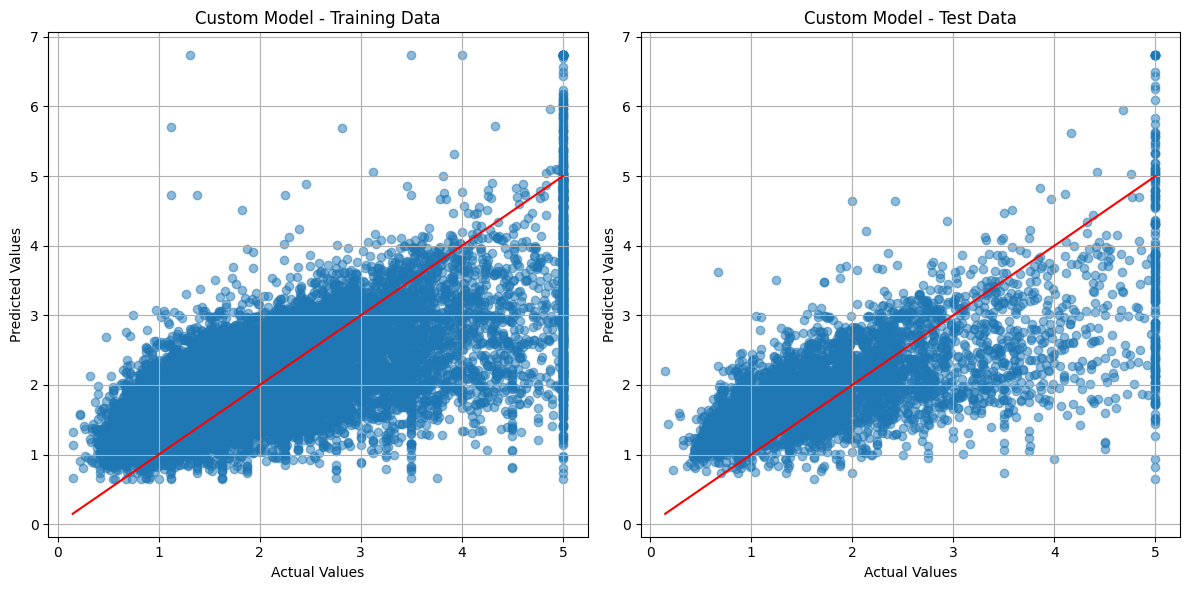

In [15]:
# Plot for Training Data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions_custom, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')  # Diagonal line
plt.title('Custom Model - Training Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Plot for Test Data
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_predictions_custom, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.title('Custom Model - Test Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

plt.tight_layout()
plt.show()

### 2. TensorFlow Regression Model

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build a regression model using TensorFlow
tf_model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1)  # Output layer for regression
])

# Compile the TensorFlow model
tf_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the TensorFlow model
tf_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the TensorFlow model
train_loss_tf = tf_model.evaluate(X_train, y_train)
test_loss_tf = tf_model.evaluate(X_test, y_test)
print(f"TensorFlow Model - Train Loss: {train_loss_tf}, Test Loss: {test_loss_tf}")

# Predictions using the TensorFlow model
train_predictions_tf = tf_model.predict(X_train).flatten()
test_predictions_tf = tf_model.predict(X_test).flatten()

Epoch 1/50


/Users/shodz/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - loss: 1.6458 - val_loss: 0.7066
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - loss: 0.6980 - val_loss: 0.6986
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 0.6894 - val_loss: 0.6930
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 0.6712 - val_loss: 0.6882
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 0.6702 - val_loss: 0.6886
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 0.6578 - val_loss: 0.6908
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 0.6614 - val_loss: 0.6896
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 0.6681 - val_loss: 0.6922
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 0.6831 - val_loss: 0.6923
Epoch 10/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 0.6789 - val_loss: 0.6932
Epoch 11/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 0.6876 - val_loss: 0.7003
Epoch 12/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 

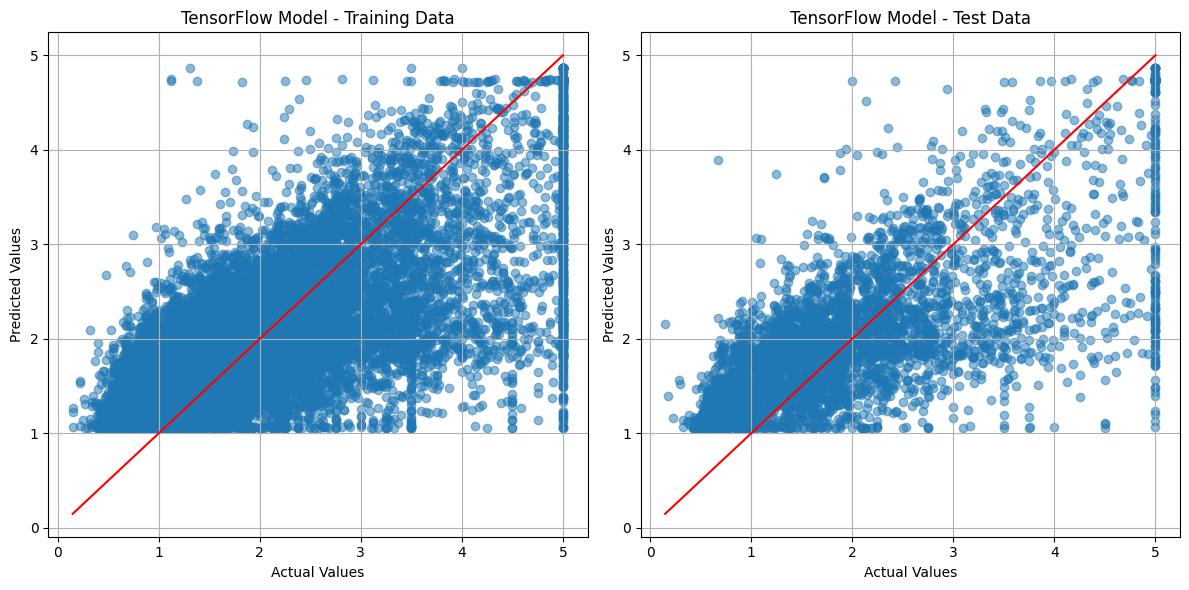

In [16]:
# Plot for Training Data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions_tf, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')  # Diagonal line
plt.title('TensorFlow Model - Training Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Plot for Test Data
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_predictions_tf, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.title('TensorFlow Model - Test Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

plt.tight_layout()
plt.show()

### 3. Comparison

In [12]:
import pandas as pd

# Create DataFrames to compare predictions
df_train_comparison = pd.DataFrame({
    'Actual': y_train,
    'Custom_Prediction': train_predictions_custom,
    'TF_Prediction': train_predictions_tf
})

df_test_comparison = pd.DataFrame({
    'Actual': y_test,
    'Custom_Prediction': test_predictions_custom,
    'TF_Prediction': test_predictions_tf
})

# Print the first few rows of the comparison DataFrames
print("Train Comparison:")
print(df_train_comparison.head())

print("Test Comparison:")
print(df_test_comparison.head())

# Print the MSE for both models
print(f"Custom Model - Train MSE: {train_mse_custom}, Test MSE: {test_mse_custom}")
print(f"TensorFlow Model - Train MSE: {train_loss_tf}, Test MSE: {test_loss_tf}")

Train Comparison:
   Actual  Custom_Prediction  TF_Prediction
0   1.030           1.811473       1.819185
1   3.821           2.043325       2.010459
2   1.726           2.187494       2.145053
3   0.934           1.259162       1.193951
4   0.965           1.935010       1.909336
Test Comparison:
    Actual  Custom_Prediction  TF_Prediction
0  0.47700           1.149589       1.077130
1  0.45800           1.506069       1.469208
2  5.00001           1.903937       1.880327
3  2.18600           2.850594       2.892222
4  2.78000           2.006633       1.976203
Custom Model - Train MSE: 0.6991447170182823, Test MSE: 0.7091157771068477
TensorFlow Model - Train MSE: 0.6763759255409241, Test MSE: 0.6944481730461121


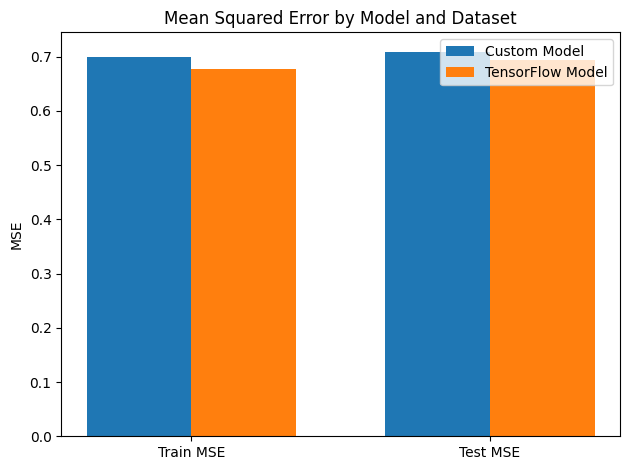

In [17]:
# Plot the comparison of MSE for both models
labels = ['Train MSE', 'Test MSE']
custom_mse = [train_mse_custom, test_mse_custom]
tensorflow_mse = [train_loss_tf, test_loss_tf]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, custom_mse, width, label='Custom Model')
rects2 = ax.bar(x + width/2, tensorflow_mse, width, label='TensorFlow Model')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MSE')
ax.set_title('Mean Squared Error by Model and Dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()